In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\linew\AppData\Local\Temp\ipykernel_33108\1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<h1>Get some data</h1>

In [2]:
df = pd.read_csv('penguins.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                334 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


We removed all nulls 

In [4]:
df = df.dropna()

We processed the data

In [5]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

# We encode the gender
df_gender = df[["sex"]]
df["sex"] = ordinal_encoder.fit_transform(df_gender)

#Here we drop the outliers
df = df.drop(9)
df = df.drop(14)
df[:10]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1.0
1,39.5,17.4,186.0,3800.0,0.0
2,40.3,18.0,195.0,3250.0,0.0
4,36.7,19.3,193.0,3450.0,0.0
5,39.3,20.6,190.0,3650.0,1.0
6,38.9,17.8,181.0,3625.0,0.0
7,39.2,19.6,195.0,4675.0,1.0
12,41.1,17.6,182.0,3200.0,0.0
13,38.6,21.2,191.0,3800.0,1.0
15,36.6,17.8,185.0,3700.0,0.0


<h1>standalize data </h1>

We standalized the data to make sure it fitted the model better

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled_df = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994


<h1>PCA</h1>

Since we had multiple columns we used PCA to collect them into to columns 

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df_scaled_df)

In [8]:
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2'])

here we checked for the outliners that be went back earlier and removed

In [9]:
pca_df[pca_df["PC 2"] > 4]

,PC 1,PC 2


<h1>Elbow diagram</h1>
We made an elbow diagram to see how many clusters we needed, and it looks like the elbow bends at 4.

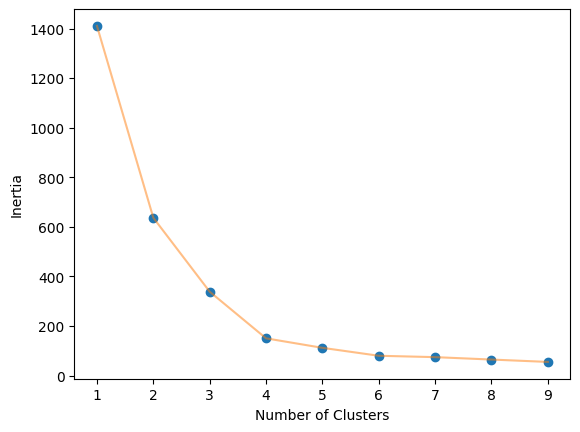

In [10]:
import numpy as np
from sklearn.cluster import KMeans

def elbow_plot(data,clusters):
    inertia = []
    for n in range(1, clusters):
        algorithm = KMeans(
            n_clusters=n,
            init="k-means++",
            random_state=125,
        )
        algorithm.fit(data)
        inertia.append(algorithm.inertia_)
    # Plot
    plt.plot(np.arange(1 , clusters) , inertia , 'o')
    plt.plot(np.arange(1 , clusters) , inertia , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
    plt.show();

elbow_plot(pca_df,10)

To make sure that we need 4 clusters we made a silhouette diagram, and it confirmed that we have 4 clusters.

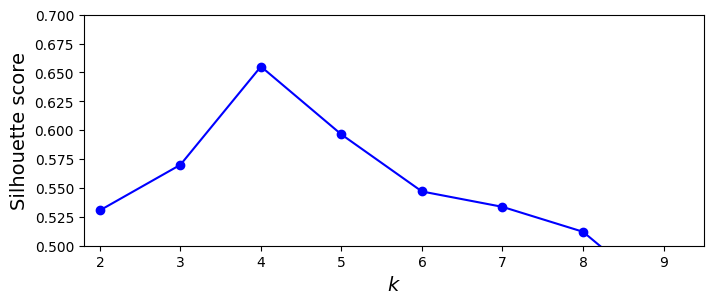

In [11]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(pca_df)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]


silhouette_scores = [silhouette_score(pca_df, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 9.5, 0.5, 0.7])
plt.show()

<h1>Clustering</h1>

Here we make an diagram of our clustering.

In [12]:
kmeans = KMeans(n_clusters=4, n_init=1000, random_state=42)
kmeans.fit(pca_df)

KMeans(n_clusters=4, n_init=1000, random_state=42)

<Axes: xlabel='PC 1', ylabel='PC 2'>

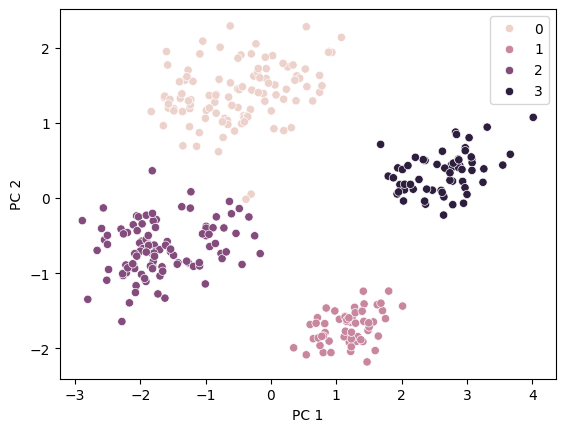

In [13]:
import seaborn as sns
sns.scatterplot(x = "PC 1", y = "PC 2", data = pca_df, hue = kmeans.labels_)

Here we can conclude that there are 4 types of penguins in our data set. 